# <center><font color="#23C9FF">HR Analytics</font></center>
* <font color="#23C9FF">Author : ***H. Moustapha Ousmane***<br>

### <center style='color: #23C9FF;'>1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import altair as alt


### <center style='color: #23C9FF;'>2. Data Exploration & Cleaning

In [2]:
data = pd.read_csv ('HR-Employee-Attrition.csv')
data.head ()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
print (f"The shape of the dataset : {data.shape}\n")

print ("Descriptive statistics :\n")
data.describe ()

The shape of the dataset : (1470, 35)

Descriptive statistics :



,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
column_names = data.columns.tolist ()
numerical_columns = data._get_numeric_data ().columns
numerical_columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [5]:
cat_colums = data.drop (numerical_columns, axis = 1)
cat_colums.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

##### <font color="#23C9FF">Récapitulation</font> :
* <font color="#23C9FF">ariabes</font>
    - Numerical Variables :
<p style='text-align: justify;'>
        Age, DailyRate, DistanceFromHome, Education, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager
</p>
    
    - Categoricale variables :
<p style='text-align: justify;'>
        Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime
<p style='text-align: justify;'>

* <font color="#23C9FF">Dimensions</font>
    - Rows : 1470
    - Columns : 35


In [6]:
i = 1
for col in numerical_columns :
    for column in numerical_columns :
        correlation = data[col].corr (data[column])
        # print (correlation)
        if ((correlation == - 1 or (correlation > -1 and correlation <= - 0.99)) or correlation == 1 or (correlation < 1 and correlation >= 0.99)) :
            if (col != column) :
                print (f"The correlation between {col} and {column} is : {correlation}")
                i = 0
if (i == 1) :
    print ("There are no colums with a high correlation coefficient. So there not any redundant column to be deleted.")


There are no colums with a high correlation coefficient. So there not any redundant column to be deleted.


* <font color="#23C9FF">***Duplicates***<br>

In [7]:
print ('Number of duplicated data :', data.duplicated ().sum ())

Number of duplicated data : 0


In [8]:
print ('There are no duplicates to be dropped')

There are no duplicates to be dropped


* <font color="#23C9FF">***Individual columns***<br>
    - <font color="#23C9FF">***Identify individual columns***<br>

In [9]:
uniq_val_columns = []
print ("The individual colomns are : ")
for item in column_names :
    if len (data [item].unique ()) == 1 :
        print ('==============================')
        print (data [item].value_counts ())
        uniq_val_columns.append (item)

The individual colomns are : 
1    1470
Name: EmployeeCount, dtype: int64
Y    1470
Name: Over18, dtype: int64
80    1470
Name: StandardHours, dtype: int64


*
    - <font color="#23C9FF">***Drop those columns***<br>

In [10]:
print ('Data shape before dropping individual columns :', data.shape)
data = data.drop (uniq_val_columns, axis = 1)
print ('Data shape after dropping individual columns :', data.shape)

Data shape before dropping individual columns : (1470, 35)
Data shape after dropping individual columns : (1470, 32)


* <font color="#23C9FF">***NaN values***<br>

In [11]:
print ('Number of NaN values in each column :')
data.isna ().sum ()

Number of NaN values in each column :


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [12]:
print ('There is not a single NaN value.')

There is not a single NaN value.


### <center style='color: #23C9FF;'>3. Data Vizualisation

In order to keep the lines of code DRY (Don't Repeat Yourserf), your are going to write a couple of functions

In [13]:
def my_value_counts (variable) :
    return data [variable].value_counts ()

def plot_pie_chart (variable) :
    variable_counts = my_value_counts (variable)
    print (variable_counts)
    variable_values = variable_counts.index
    plt.pie (variable_counts, labels = variable_values)
    plt.title (variable)
    plt.show ()

def plot_donut_chart (variable) :
    variable_counts = my_value_counts (variable)
    print (variable_counts)
    variable_values = variable_counts.index
    plt.pie (variable_counts, labels = variable_values, wedgeprops = {'edgecolor' : 'white'})
    circle = patches.Circle ((0, 0), 0.70, fc = 'white')
    plt.gca ().add_patch (circle)
    plt.title (variable)
    plt.legend ()
    plt.show ()

def plot_bar_chart (variable) :
    variable_counts = my_value_counts (variable)
    print (variable_counts)
    values = variable_counts.index
    heights = variable_counts.tolist ()
    colors = ['blue', 'green', 'orange', 'red', 'yellow', 'purple', 'brown', 'black']
    plt.bar (values, height = heights, width = 0.25, color = colors [:len (heights)])
    plt.xlabel (variable)
    plt.ylabel (str (variable) + ' Counts')
    plt.title (variable)
    plt.show ()

* <font color="#23C9FF">***Correlation map for all numeric variables***<br>

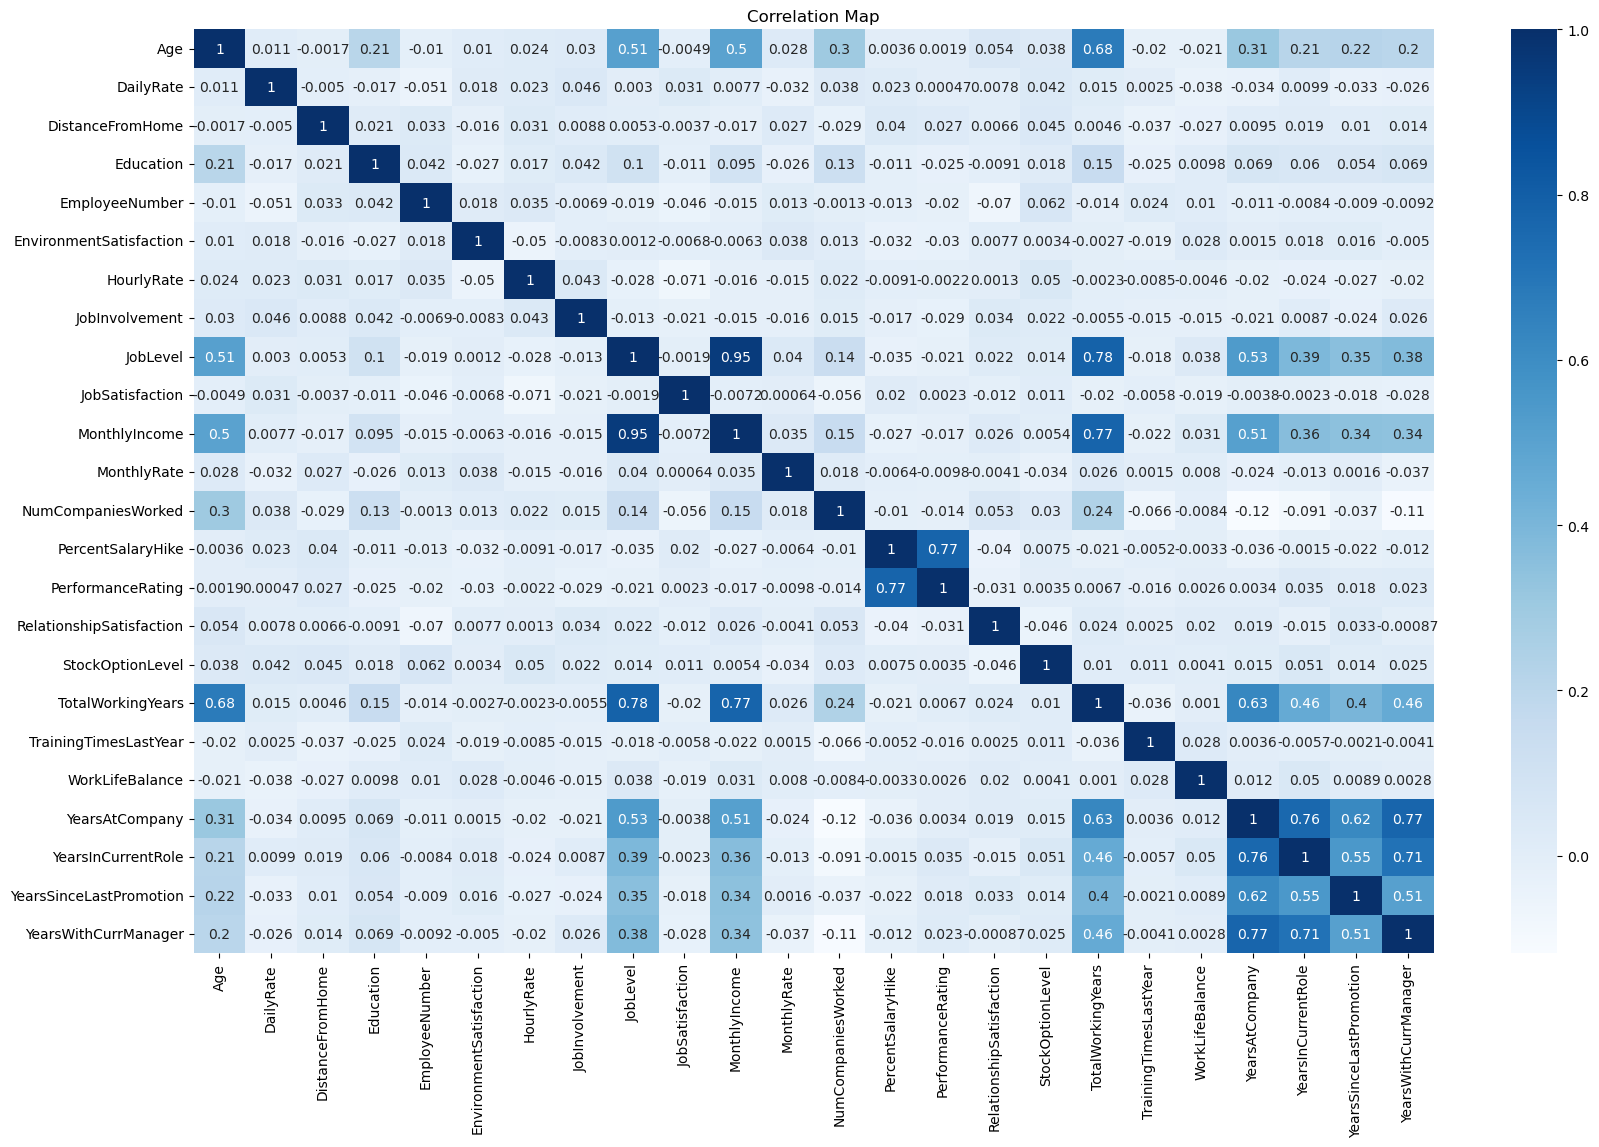

In [14]:
numerical_columns = data._get_numeric_data ().columns
plt.figure (figsize = (20, 12))
correlation_matrix = data [numerical_columns].corr ()
sns.heatmap (correlation_matrix, annot = True, cmap = 'Blues')
plt.title ('Correlation Map')
plt.show ()

* <font color="#23C9FF">***Overtime***<br>

No     1054
Yes     416
Name: OverTime, dtype: int64


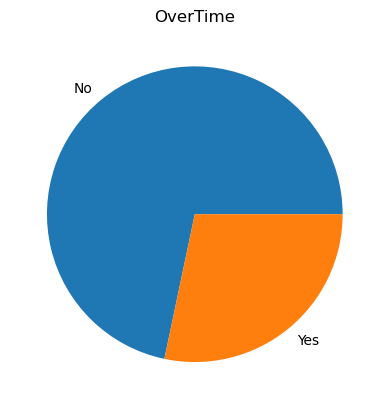

In [15]:
plot_pie_chart ('OverTime')

* <font color="#23C9FF">***Marital Status***<br>

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


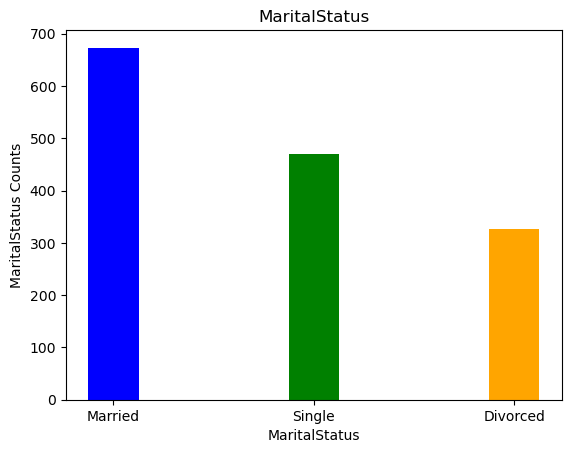

In [16]:
plot_bar_chart ('MaritalStatus')

* <font color="#23C9FF">***Job Role***<br>

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


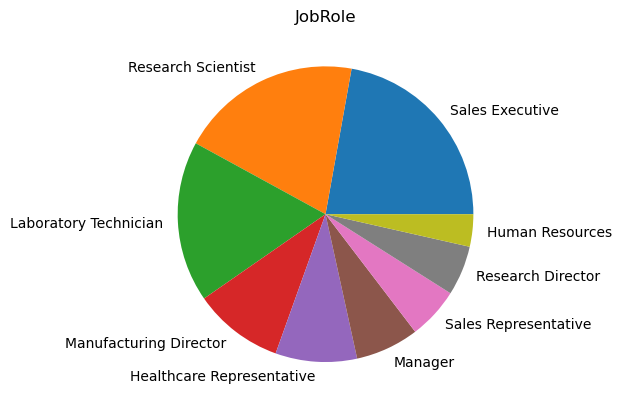

In [17]:
plot_pie_chart ('JobRole')

* <font color="#23C9FF">***Gender***<br>

Male      882
Female    588
Name: Gender, dtype: int64


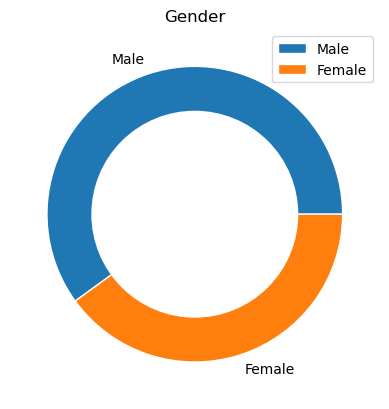

In [18]:
plot_donut_chart ('Gender')

* <font color="#23C9FF">***Education Field***<br>

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


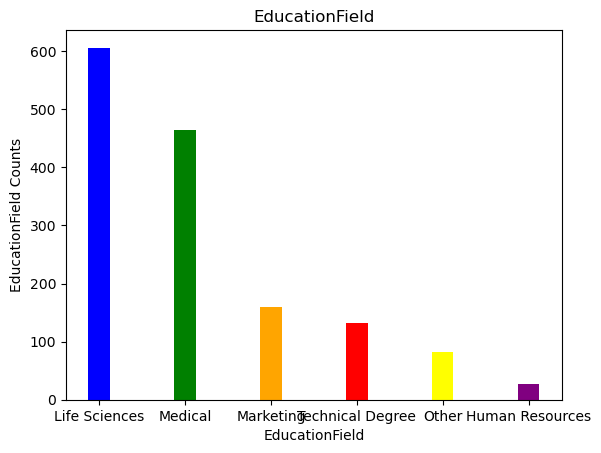

In [19]:
plot_bar_chart ('EducationField')

* <font color="#23C9FF">***Department***<br>

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


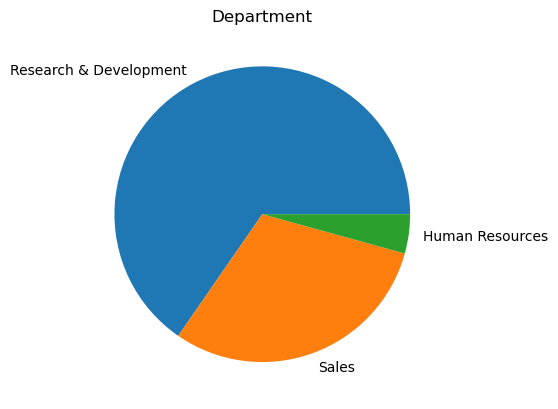

In [20]:
plot_pie_chart ('Department')

* <font color="#23C9FF">***Department***<br>

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


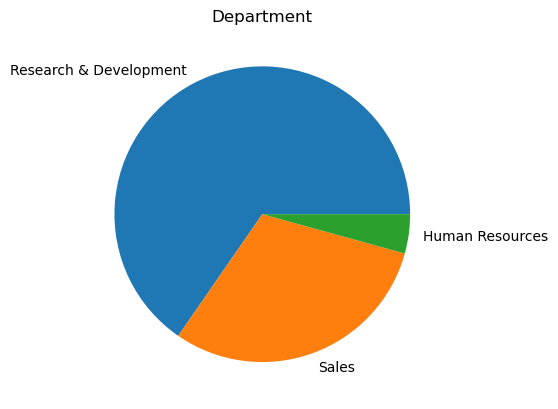

In [21]:
plot_pie_chart ('Department')

* <font color="#23C9FF">***Business Travel***<br>

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


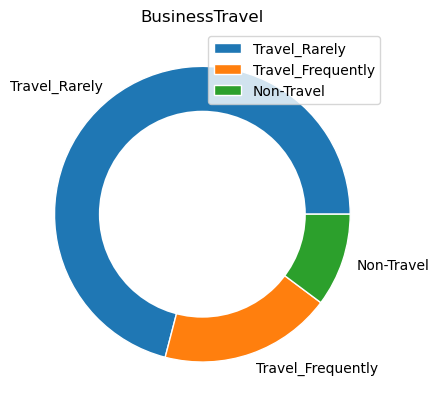

In [22]:
plot_donut_chart ('BusinessTravel')

* <font color="#23C9FF">***Relation between `Over Time` and `Age`***<br>

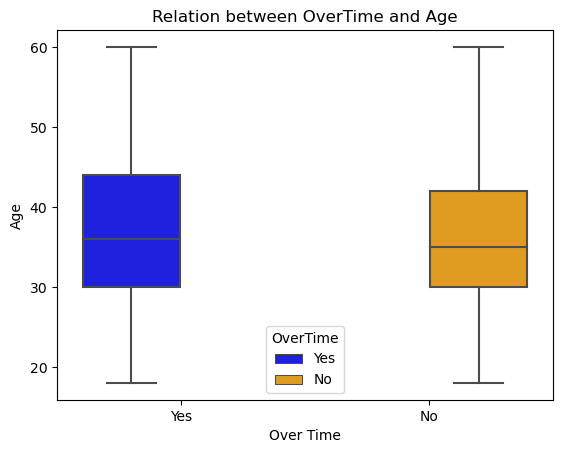

In [23]:
colors = ['blue', 'orange']
x = data ['OverTime']
sns.boxplot (x = x, y = data ['Age'], hue = x, palette = colors)
plt.xlabel ('Over Time')
plt.ylabel ('Age')
plt.title ('Relation between OverTime and Age')
plt.show ()

* <font color="#23C9FF">***Total Working Years***<br>

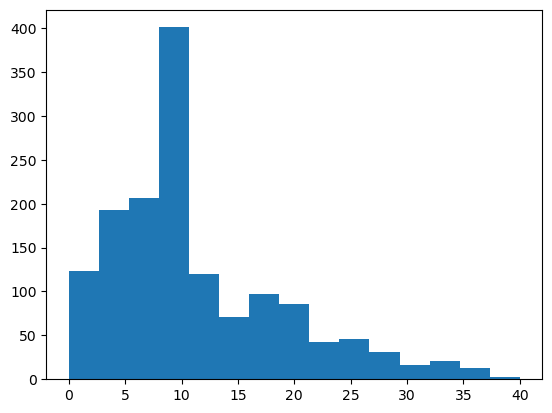

In [24]:
fig, ax = plt.subplots ()
ax.hist (data ['TotalWorkingYears'], bins = 15)
plt.show ()

* <font color="#23C9FF">***Number Of Companies Worked***<br>

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64


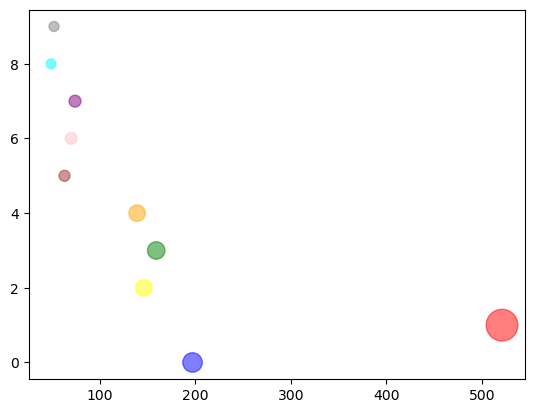

In [25]:
number_companies = my_value_counts ('NumCompaniesWorked')
companies = number_companies.index
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'cyan']
print (number_companies)
plt.scatter (number_companies, companies, s = number_companies, c = colors, alpha = 0.5)
plt.show ()

* <font color="#23C9FF">***Distance FromHome***<br>

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64


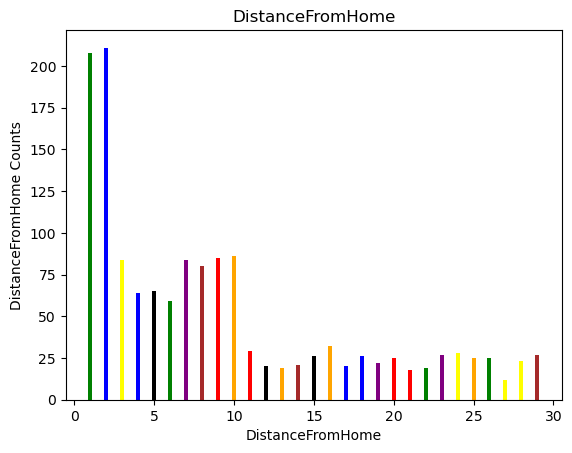

In [26]:
plot_bar_chart ('DistanceFromHome')